In [1]:
import pandas as pd;
import numpy as np
import matplotlib.pyplot as plt
input_data_path = r"bank-additional-full.csv";
data=pd.read_csv(input_data_path,sep=";");

In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
dataY=data[data["y"]=="yes"]
dataN=data[data["y"]=="no"]

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def ShowGroupAndY(fields):
    for field in fields:
        ages = sorted(data[field].drop_duplicates())
#ages=ages[0:10]
        N = len(ages)
        #print(ages)
        AgeN = [(dataN[dataN[field]==age]["y"].count()*100/data[data[field]==age]["y"].count()) for age in ages]
       
        AgeY = [dataY[dataY[field]==age]["y"].count()*100/data[data[field]==age]["y"].count() for age in ages]
        ind = np.arange(N)    # the x locations for the groups
        width = 0.35       # the width of the bars: can also be len(x) sequence
       # AgeFull = [  100 for age in ages]
#print(AgeY)
#print(AgeN)
        p1 = plt.bar(ind, AgeN, width )
        p2 = plt.bar(ind, AgeY, width ,
             bottom=AgeN)

        plt.ylabel('count(*)')
        plt.title('count by group by '+field)
        if(len(ages)>20):
           # ind = np.arange(int(N/10))    # the x locations for the groups
           # print(ind)
            gap=10;
            if len(ages)>3000:
                gap=1000
            elif len(ages)>300:
                gap=100
            else:
                gap=10 
            xti_ages=[ ages[i] if (i%gap==0) else "" for i in ind]
            plt.xticks(ind, xti_ages , rotation='vertical' )
            #xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
        elif len(ages)>5:
            plt.xticks(ind, ages, rotation='vertical')
        else:
            plt.xticks(ind, ages )
        plt.yticks(np.arange(0, 100, 10))
        plt.legend((p1[0], p2[0]), ('No', 'Yes'))
        plt.show()

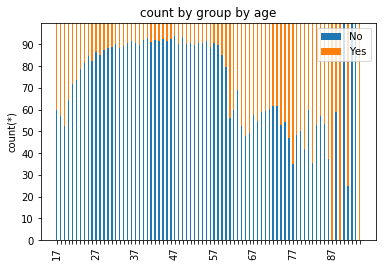

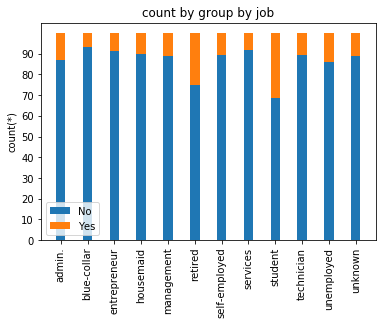

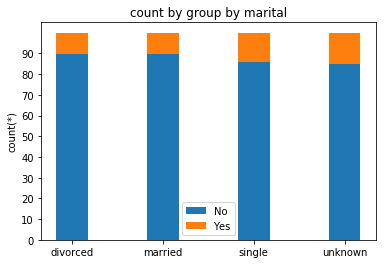

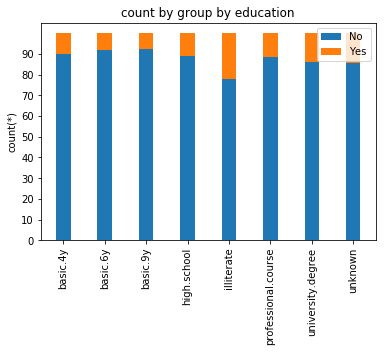

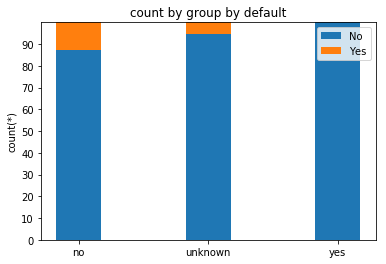

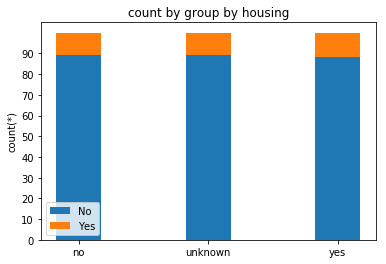

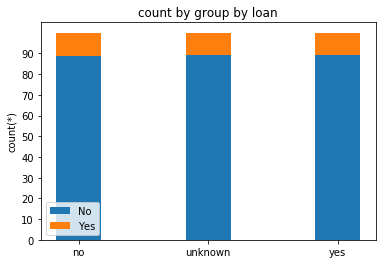

In [6]:
ShowGroupAndY(['age','job','marital','education','default','housing','loan'])

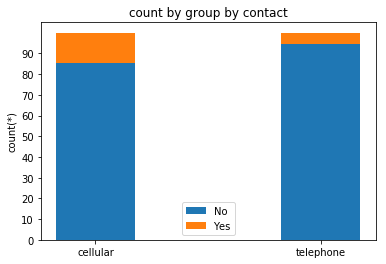

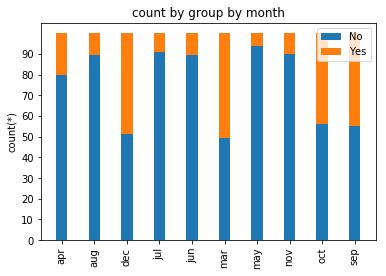

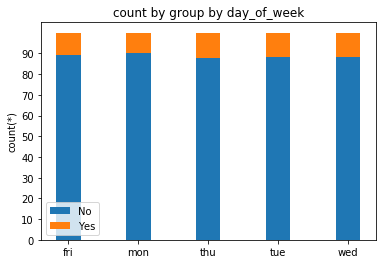

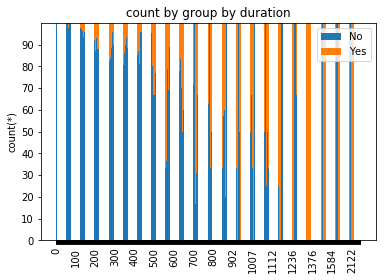

In [7]:
ShowGroupAndY(['contact','month','day_of_week','duration'])

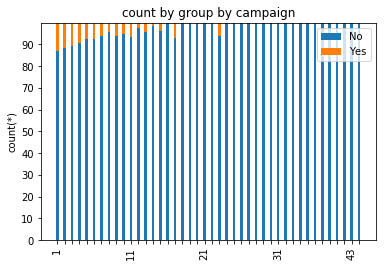

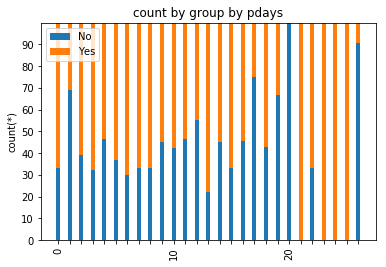

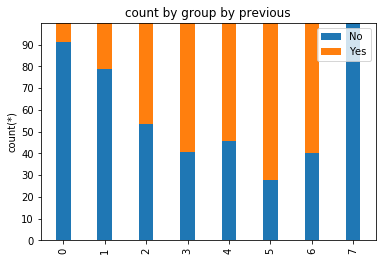

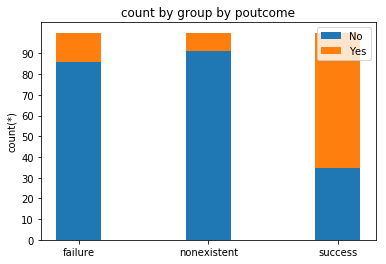

In [8]:
ShowGroupAndY(['campaign','pdays','previous','poutcome'])

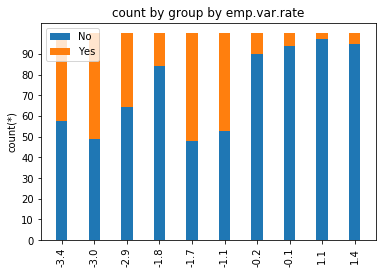

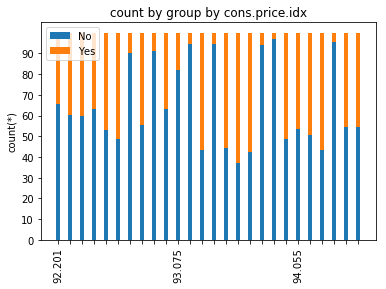

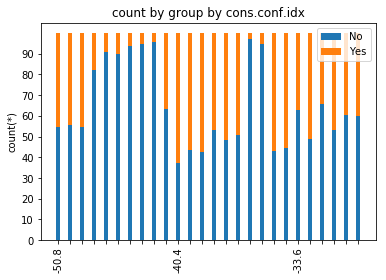

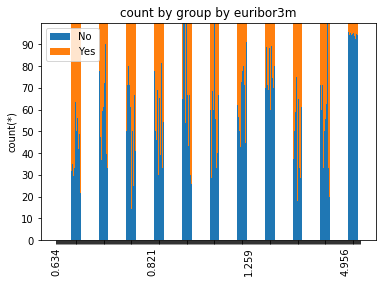

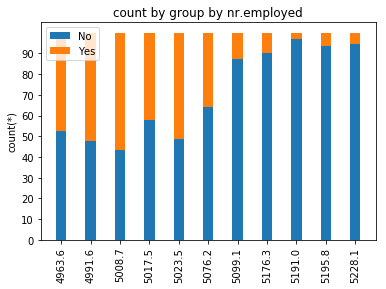

In [9]:
ShowGroupAndY(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']) 

In [10]:
data.groupby('job').age.agg(['mean','min', 'max','count' ])

,mean,min,max,count
job,,,,
admin.,38.187296,20,72,10422
blue-collar,39.555760,20,80,9254
entrepreneur,41.723214,20,69,1456
housemaid,45.500000,21,85,1060
management,42.362859,21,80,2924
retired,62.027326,23,98,1720
self-employed,39.949331,21,71,1421
services,37.926430,20,69,3969
student,25.894857,17,47,875


In [11]:
data.groupby('marital').age.agg(['mean','min', 'max','count' ])

,mean,min,max,count
marital,,,,
divorced,44.899393,24,95,4612
married,42.307165,20,98,24928
single,33.158714,17,86,11568
unknown,40.275000,25,66,80


In [12]:
data.groupby('education').age.agg(['mean','min', 'max','count' ])

,mean,min,max,count
education,,,,
basic.4y,47.596504,18,98,4176
basic.6y,40.448953,18,95,2292
basic.9y,39.061208,17,94,6045
high.school,37.998213,18,88,9515
illiterate,48.500000,34,80,18
professional.course,40.080107,20,86,5243
university.degree,38.879191,20,91,12168
unknown,43.481225,17,92,1731


In [13]:
def del_unknown(data):
    # fill_attrs = ["default"]
    del_attrs = ['job','marital','education','housing','loan']
    for i in del_attrs: 
        # delete col containing unknown
        data = data[data[i] != "unknown"]  
    return data

In [14]:
data=del_unknown(data)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 21 columns):
age               38245 non-null int64
job               38245 non-null object
marital           38245 non-null object
education         38245 non-null object
default           38245 non-null object
housing           38245 non-null object
loan              38245 non-null object
contact           38245 non-null object
month             38245 non-null object
day_of_week       38245 non-null object
duration          38245 non-null int64
campaign          38245 non-null int64
pdays             38245 non-null int64
previous          38245 non-null int64
poutcome          38245 non-null object
emp.var.rate      38245 non-null float64
cons.price.idx    38245 non-null float64
cons.conf.idx     38245 non-null float64
euribor3m         38245 non-null float64
nr.employed       38245 non-null float64
y                 38245 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [16]:
data=data.replace({'job':{'admin.':'admin'}})

In [17]:
data.groupby('education').age.agg(['mean','min', 'max','count' ])

,mean,min,max,count
education,,,,
basic.4y,47.545227,18,98,4002
basic.6y,40.438748,18,95,2204
basic.9y,39.073941,17,94,5856
high.school,37.993077,18,88,9244
illiterate,48.500000,34,80,18
professional.course,40.087843,20,86,5100
university.degree,38.890957,20,91,11821


In [18]:
data=data.replace({'education':{'basic.4y':'primary','basic.6y':'primary','basic.9y':'scecondary',
                                'high.school' :'scecondary', 'professional.course' :'tertiary', 
                                'university.degree' :'tertiary'}})

In [19]:
data=data[(data["job"]!='retired')|(data["age"]>50)]

In [20]:
data['index_col'] = data.index


In [21]:
data=data.replace({'housing':{'yes':1,'no':0}})

In [22]:
data.groupby("education").age.agg(["min","max",'count'])

,min,max,count
education,,,
illiterate,34,80,16
primary,18,98,6156
scecondary,17,94,15058
tertiary,20,91,16901


In [23]:
data=data.replace({'education':{'illiterate':1,'primary':2,'scecondary':3,'tertiary':4}})

In [24]:
data['M1'] = data.marital.apply(lambda x: 1 if 'married' in x else 0)
data['M2'] = data.marital.apply(lambda x: 1 if 'single' in x else 0)

In [25]:

data=data.replace({'contact':{'cellular':1,'telephone':0}})
data=data.replace({'loan':{'yes':1,'no':0}})
data=data.replace({'default':{'yes':1,'no':0,'unknown':2}})
data=data.replace({'poutcome':{'failure':1,'nonexistent':2,'success':3}})
data=data.replace({'y':{'yes':1,'no':0}})

In [26]:
def encode_multi_attrs(data,field,values): 
    levels = range(1,len(values)+1)
    dict_levels = dict(zip(values, levels))
    for v in values:
        data.loc[data[field] == v, field] = dict_levels[v]
    return data

In [27]:
data=encode_multi_attrs(data,'job',['admin','blue-collar','entrepreneur','housemaid','management','retired',
                                    'self-employed','services','student','technician','unemployed'])
data=encode_multi_attrs(data,'month',['jan','feb','mar','apr',
'may','jun','jul','aug',
'sep','oct','nov','dec'])
data=encode_multi_attrs(data,'day_of_week',['mon','tue','wed','thu','fri']) 

In [28]:
del data["marital"]
del data["housing"]
del data["loan"]
del data["day_of_week"]
del data["duration"]

In [29]:
from sklearn.utils import shuffle
data=shuffle(data)
data_len = data['y'].count()
split1 = int(data_len*0.9) 
train_data = data[:split1]
test_data = data[split1:]

In [30]:
train_data.groupby("y").age.agg(['count'])

,count
y,
0,30490
1,3827


In [31]:
test_data.groupby("y").age.agg(["count"])

,count
y,
0,3391
1,423


In [32]:
x_train = np.array(train_data.ix[:, train_data.columns != 'y'])
y_train = np.array(train_data.ix[:, train_data.columns == 'y'])
print('Shape of X: {}'.format(x_train.shape))
print('Shape of y: {}'.format(y_train.shape))


Shape of X: (34317, 18)
Shape of y: (34317, 1)


C:\Users\william\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [3827]
Before OverSampling, counts of label '0': [30490] 

After OverSampling, the shape of train_X: (60980, 18)
After OverSampling, the shape of train_y: (60980,) 

After OverSampling, counts of label '1': 30490
After OverSampling, counts of label '0': 30490


In [42]:

import pandas as pd
import numpy as np
from matplotlib import pylab
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [37]:
def plot_pr(auc_score, precision, recall, label=None):  
    pylab.figure(num=None, figsize=(6, 5))  
    pylab.xlim([0.0, 1.0])  
    pylab.ylim([0.0, 1.0])
    pylab.xlabel('Recall')  
    pylab.ylabel('Precision')  
    pylab.title('P/R (AUC=%0.2f) / %s' % (auc_score, label))  
    pylab.fill_between(recall, precision, alpha=0.2)  
    pylab.grid(True, linestyle='-', color='0.75')  
    pylab.plot(recall, precision, lw=1)      
    pylab.show()
    

In [40]:
def train_evaluate(classifier,  threshold = 0.5):  
  
    test_X = test_data.drop('y', axis=1)
    test_y = test_data['y']
    
    classifier = classifier.fit(X_train_res, y_train_res)
    prodict_prob_y = classifier.predict_proba(test_X)[:,1]
    report = classification_report(test_y, prodict_prob_y > threshold,
                                   target_names = ['0', '1'])
    prodict_y = (prodict_prob_y > threshold).astype(int)
    accuracy = np.mean(test_y.values == prodict_y)
    print("Accuracy: {}".format(accuracy))    
    print(report)
    fpr, tpr, thresholds = metrics.roc_curve(test_y, prodict_prob_y)
    precision, recall, thresholds = metrics.precision_recall_curve(test_y, prodict_prob_y)  
    test_auc = metrics.auc(fpr, tpr)
    plot_pr(test_auc, precision, recall, "yes")
    
    return prodict_y

Accuracy: 0.8775563712637651
             precision    recall  f1-score   support

          0       0.93      0.94      0.93      3391
          1       0.44      0.39      0.42       423

avg / total       0.87      0.88      0.87      3814



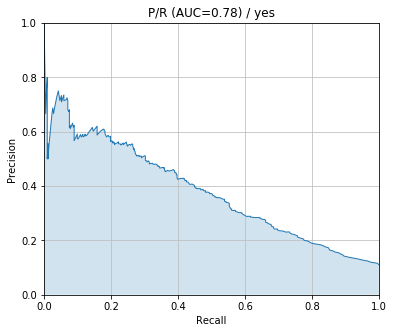

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
    forest = RandomForestClassifier(n_estimators=400, oob_score=True) 
    train_evaluate( forest, threshold=0.4)

Accuracy: 0.5503408495018354
             precision    recall  f1-score   support

          0       0.95      0.52      0.67      3391
          1       0.17      0.78      0.28       423

avg / total       0.86      0.55      0.63      3814



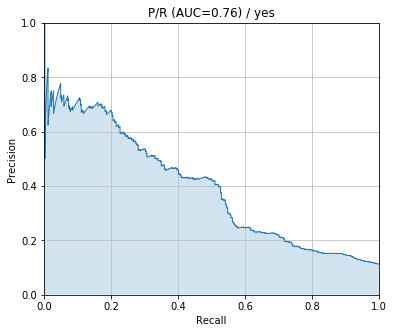

array([1, 1, 1, ..., 1, 0, 0])

In [44]:
    lr = LogisticRegression(max_iter=100, C=1, random_state=0)
    train_evaluate( lr, threshold=0.4)

Accuracy: 0.8366544310435239
             precision    recall  f1-score   support

          0       0.94      0.87      0.90      3391
          1       0.36      0.58      0.44       423

avg / total       0.88      0.84      0.85      3814



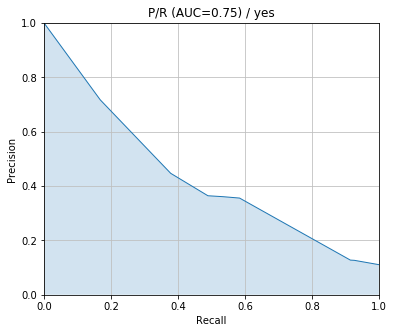

array([0, 0, 0, ..., 1, 0, 0])

In [46]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
train_evaluate( DecisionTree, threshold=0.4)

Accuracy: 0.8534347142108023
             precision    recall  f1-score   support

          0       0.94      0.89      0.92      3391
          1       0.39      0.56      0.46       423

avg / total       0.88      0.85      0.86      3814



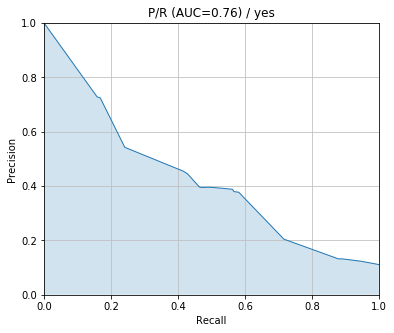

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(max_depth=5)
train_evaluate( DecisionTree, threshold=0.4)

Accuracy: 0.7425275301520713
             precision    recall  f1-score   support

          0       0.95      0.75      0.84      3391
          1       0.25      0.68      0.37       423

avg / total       0.87      0.74      0.79      3814



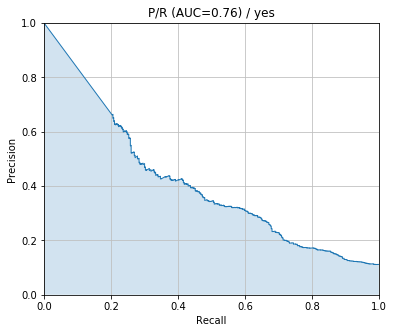

array([1, 0, 0, ..., 1, 0, 0])

In [49]:
from sklearn.naive_bayes import GaussianNB
naive_bay=GaussianNB()
train_evaluate( naive_bay, threshold=0.4)

In [ ]:
from sklearn.svm import SVC
svmClass=SVC(gamma=2, C=1)
train_evaluate( svmClass, threshold=0.4)

In [ ]:

from sklearn.ensemble import  AdaBoostClassifier
AdaBoost =AdaBoostClassifier()
train_evaluate( AdaBoost, threshold=0.4)

In [ ]:
from sklearn.neural_network import MLPClassifier
MLPClass =  MLPClassifier(alpha=1)
train_evaluate( MLPClass, threshold=0.4)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClass =  KNeighborsClassifier(3)
train_evaluate( KNeighborsClass, threshold=0.4)

Automatically created module for IPython interactive environment


C:\Users\william\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\william\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\william\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


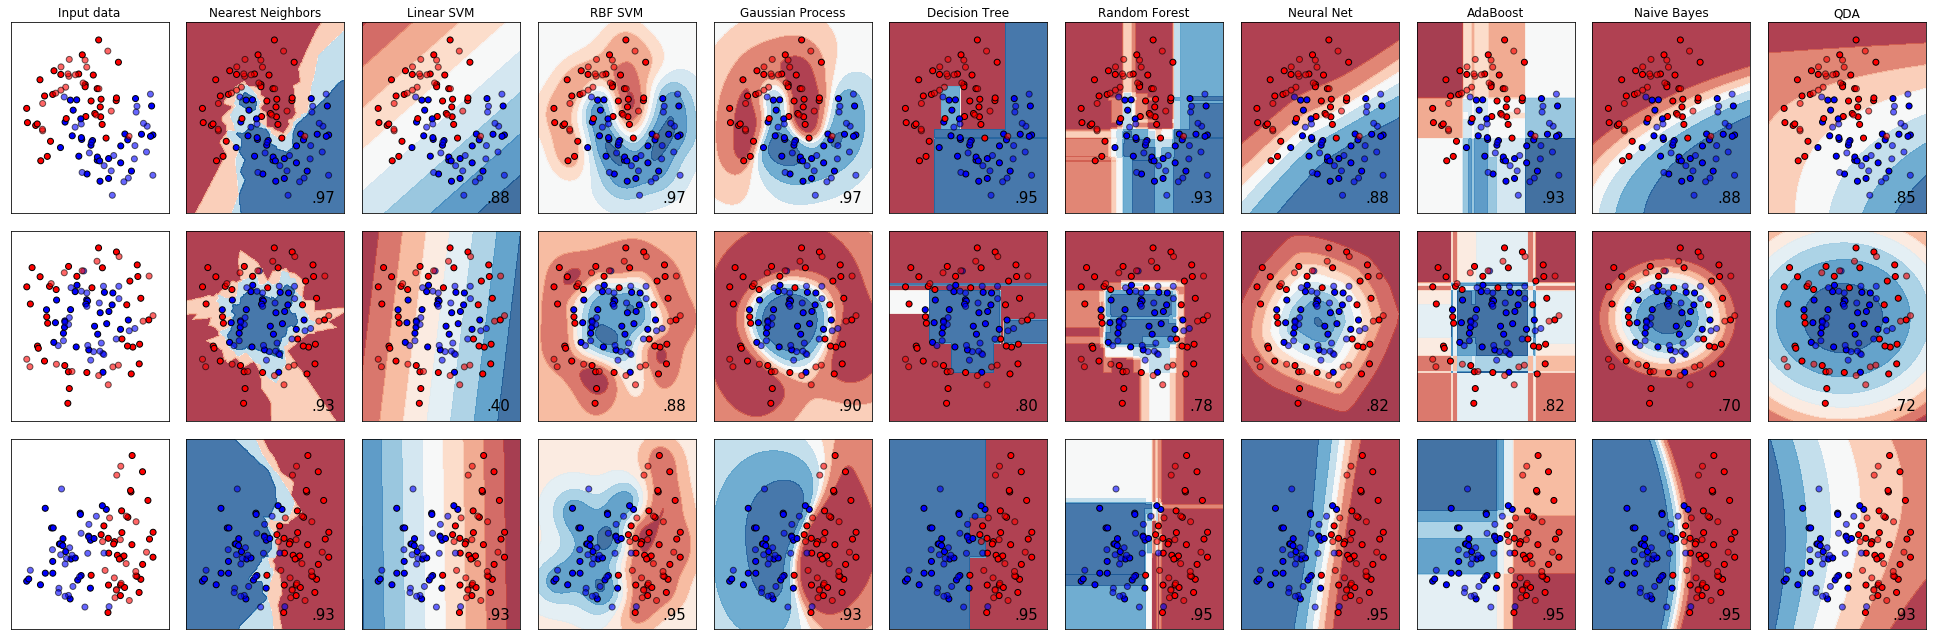

In [47]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()